# **Clasificación de pacientes niños y niñas menores a 5 años con obesidad del Perú en el año 2019**

El presente código evalua variables relacionadas a niños y niñas menores a 5 años de todo el Perú que fueron atendidos en los establecimientos de salud de Dirección Regional de Salud (Diresa) en el año 2019, con el objetivo de poder clasificar a los pacientes por los resultados de su Indice de Masa Corporal (IMC).

Se aplicarán 5 modelos de entrenamiento para poder clasificar correctamente a los pacientes, los modelos a utilizar son los siguientes:
- Random Forest
- Decision Trees
- Multinominal Logistic Regression
- Support Vector Machine
- Naibe Bayes

A continuuación se pasará a presentar cada uno de los modelos y los pasos que se realizan para el buen funcionamiento de la clasificación de pacientes.

## Featuring Enginnering

### Importación de Datos

En este primer paso se implementan los datos con los que se trabajará para poder determinar la clasificación de los pacientes con obesidad, como se mencionó se utilizará la data recopilada de la [Plataforma Nacional de Datos Abiertos](https://www.datosabiertos.gob.pe/dataset/sien-sistema-de-informaci%C3%B3n-del-estado-nutricional-de-ni%C3%B1os-y-gestantes-per%C3%BA-inscenan "Plataforma Nacional de Datos Abiertos").

Por otro lado, se mostrará la **variable dependiente** que utilizaremos y cuales son variables.

In [1]:
import pandas as pd

# Se utilizan las sigueintes 2 líneas de código para eliminar los rangos de las columnas y filas al mostrar los resultados.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Se importa la data alojada en DataBase
df_moquegua = pd.read_csv('DataBase/Niños MOQUEGUA.csv')
df_amazonas = pd.read_csv('DataBase/Niños AMAZONAS.csv')
df_ancash = pd.read_csv('DataBase/Niños ANCASH.csv')
df_arequipa = pd.read_csv('DataBase/Niños AREQUIPA.csv')
df_ayacucho = pd.read_csv('DataBase/Niños AYACUCHO.csv')
df_cajamarca = pd.read_csv('DataBase/Niños CAJAMARCA.csv')
df_callao = pd.read_csv('DataBase/Niños CALLAO.csv')
df_cusco = pd.read_csv('DataBase/Niños CUSCO.csv')
df_huancavelica = pd.read_csv('DataBase/Niños HUANCAVELICA.csv')
df_huanuco = pd.read_csv('DataBase/Niños HUANUCO.csv')
df_ica = pd.read_csv('DataBase/Niños ICA.csv')
df_junin = pd.read_csv('DataBase/Niños JUNIN.csv')
df_la_libertad = pd.read_csv('DataBase/Niños LA LIBERTAD.csv')
df_lambayeque = pd.read_csv('DataBase/Niños LAMBAYEQUE.csv')
df_loreto = pd.read_csv('DataBase/Niños LORETO.csv')
df_madre_de_dios = pd.read_csv('DataBase/Niños MADRE DE DIOS.csv')
df_pasco = pd.read_csv('DataBase/Niños PASCO.csv')
df_piura = pd.read_csv('DataBase/Niños PIURA.csv')
df_puno = pd.read_csv('DataBase/Niños PUNO.csv')
df_san_martin = pd.read_csv('DataBase/Niños SAN MARTIN.csv')
df_tacna = pd.read_csv('DataBase/Niños TACNA.csv')
df_ucayali = pd.read_csv('DataBase/Niños UCAYALI.csv')
df_lima_centro = pd.read_csv('DataBase/Niños LIMA DIRIS CENTRO.csv')
df_lima_este = pd.read_csv('DataBase/Niños LIMA DIRIS ESTE.csv')
df_lima_norte = pd.read_csv('DataBase/Niños LIMA DIRIS NORTE.csv')
df_lima_sur = pd.read_csv('DataBase/Niños LIMA DIRIS SUR.csv')
df_lima = pd.read_csv('DataBase/Niños LIMA.csv')

# Se realiza una concatenación para agregar todas las tablas a una sola con el nombre de df.
df = pd.concat([df_moquegua, df_amazonas, df_ancash, df_arequipa, df_ayacucho, df_cajamarca, df_callao, df_cusco, df_huancavelica,
                df_huanuco, df_ica, df_junin, df_la_libertad, df_lambayeque, df_loreto, df_madre_de_dios, df_pasco, df_piura, df_puno,
                df_san_martin, df_tacna, df_ucayali, df_lima_centro, df_lima_este, df_lima_norte, df_lima_sur, df_lima
                ], ignore_index=True)

df.head()

,Diresa,Red,Microred,EESS,Renipress,FechaAtencion,Sexo,FechaNacimiento,EdadMeses,UbigeoPN,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Juntos,SIS,Pin,Qaliwarma,Peso,Talla,PTZ,ZTE,ZPE,Alerta,Dx_PT,Dx_TE,Dx_PE,Hemoglobina,FechaHemoglobina,Cred,Suplementacion,Consejeria,Sesion,DEPARTAMENTO,PROVINCIA,DISTRITO,ALTITUD
0,MOQUEGUA,MOQUEGUA,OMATE,I-3 - 00002841 - CENTRO DE SALUD OMATE,2841,4/16/2019,F,5/1/2016,35,180101.0,MOQUEGUA,MARISCAL NIET,MOQUEGUA,"MOQUEGUA, CIUDAD",0,1,0,0,14.9,95.3,0.71,0.16,0.61,,Normal,Normal,Normal,,,0,0,0,0,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410
1,MOQUEGUA,MOQUEGUA,ICHUÑA,I-2 - 00002862 - P.S. YUNGA,2862,12/23/2019,M,4/21/2018,20,180210.0,MOQUEGUA,GENERAL SANCHEZ CERRO,UBINAS,"UBINAS, PUEBLO",0,1,0,0,9.7,79.0,-0.69,-1.87,-1.41,,Normal,Normal,Normal,,,1,0,0,0,MOQUEGUA,GENERAL SANCHEZ CERRO,UBINAS,3376
2,MOQUEGUA,MOQUEGUA,UBINAS,I-1 - 00002860 - P.S. ANASCAPA,2860,10/6/2019,F,10/12/2014,60,180210.0,MOQUEGUA,GENERAL SANCHEZ CERRO,UBINAS,"SACOHAYA, ANEXO",0,1,0,0,19.0,106.0,1.10,-0.70,0.29,,Normal,Normal,Normal,,,0,0,0,0,MOQUEGUA,GENERAL SANCHEZ CERRO,UBINAS,3376
3,MOQUEGUA,MOQUEGUA,UBINAS,I-1 - 00002855 - P.S. HUATAGUA,2855,9/29/2019,M,10/19/2014,59,180207.0,MOQUEGUA,GENERAL SANCHEZ CERRO,MATALAQUE,"HUATAGUA, ANEXO",0,1,0,0,13.8,100.0,-1.32,-2.08,-2.11,,Normal,D.Crónica,D.Global,,,0,1,1,0,MOQUEGUA,GENERAL SANCHEZ CERRO,MATALAQUE,2538
4,MOQUEGUA,MOQUEGUA,MOQUEGUA,I-3 - 00002825 - C.S. MARISCAL NIETO,2825,10/29/2019,F,11/7/2014,59,180101.0,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,"MOQUEGUA, CIUDAD",0,1,0,0,23.0,110.0,2.16,0.16,1.53,,Sobrepeso,Normal,Normal,,,0,0,0,0,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,1410


In [2]:
print(pd.value_counts(df['Dx_PT'], sort = True))

Dx_PT
Normal       1154734
Sobrepeso      87252
Obesidad       24451
D.Aguda        18595
Name: count, dtype: int64


<ipython-input-2-77ed12f0f437>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df['Dx_PT'], sort = True))


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285032 entries, 0 to 1285031
Data columns (total 37 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Diresa            1285032 non-null  object 
 1   Red               1285032 non-null  object 
 2   Microred          1285032 non-null  object 
 3   EESS              1285032 non-null  object 
 4   Renipress         1285032 non-null  int64  
 5   FechaAtencion     1285032 non-null  object 
 6   Sexo              1285032 non-null  object 
 7   FechaNacimiento   1285032 non-null  object 
 8   EdadMeses         1285032 non-null  int64  
 9   UbigeoPN          1285032 non-null  float64
 10  DepartamentoPN    1285032 non-null  object 
 11  ProvinciaPN       1285032 non-null  object 
 12  DistritoPN        1285032 non-null  object 
 13  CentroPobladoPN   1285032 non-null  object 
 14  Juntos            1285032 non-null  int64  
 15  SIS               1285032 non-null  int64  
 16  

### Data imputation (Imputación de Datos)

Una vez importada la data que se utilizará para trabajar en este proyecto (*1 285 032 pacientes*) se procederá a imputar la data, esto quiere decir verificar si la data contiene variables vacias las cuales deben ser **reemplazadas** o en el peor de los casos ser **eliminadas**.

#### Verificar valores nulos

Como primer paso de imputación de la data debemos verificar que la tabla no contenga valores vacios, puede mencionarse que al realizar la ejecución del código se mostró que existe un error debido a que se muestran valores vacios por eso añadimos la *4ta línea de código* que servirá para solucionar este error.

In [4]:
#Verificar Datos nulos --- Imputar
import numpy as np

df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.isnull().sum()

Diresa                    0
Red                       0
Microred                  0
EESS                      0
Renipress                 0
FechaAtencion             0
Sexo                      0
FechaNacimiento           0
EdadMeses                 0
UbigeoPN                  0
DepartamentoPN            0
ProvinciaPN               0
DistritoPN                0
CentroPobladoPN           0
Juntos                    0
SIS                       0
Pin                       0
Qaliwarma                 0
Peso                      0
Talla                     0
PTZ                       0
ZTE                       0
ZPE                       0
Alerta              1283881
Dx_PT                     0
Dx_TE                     0
Dx_PE                     0
Hemoglobina         1053183
FechaHemoglobina    1110543
Cred                      0
Suplementacion            0
Consejeria                0
Sesion                    0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO            

#### Reemplazar o Eliminar columnas

Para el segundo paso tendremos las columnas (*Alerta, Hemoglobina, FechaHemoglobina*) que contienen la mayor cantidad de valores nulos, además, podemos considerar que estas columnas no son muy relevantes para la clasificación de pacientes con obesidad por lo que procedemos a eliminarlas de la data.

Finalmente validamos si los los datos utilizados están sin variables nulas.

In [5]:
df = df.drop(['Alerta', 'Hemoglobina', 'FechaHemoglobina'], axis=1)

In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.isnull().sum()

Diresa             0
Red                0
Microred           0
EESS               0
Renipress          0
FechaAtencion      0
Sexo               0
FechaNacimiento    0
EdadMeses          0
UbigeoPN           0
DepartamentoPN     0
ProvinciaPN        0
DistritoPN         0
CentroPobladoPN    0
Juntos             0
SIS                0
Pin                0
Qaliwarma          0
Peso               0
Talla              0
PTZ                0
ZTE                0
ZPE                0
Dx_PT              0
Dx_TE              0
Dx_PE              0
Cred               0
Suplementacion     0
Consejeria         0
Sesion             0
DEPARTAMENTO       0
PROVINCIA          0
DISTRITO           0
ALTITUD            0
dtype: int64

### Categorical Encoding (Codificación categórica)

Una vez imputada la data eliminando las variables nulas procedemos a convertir las *variables categóricas* que contienen variables **no-numéricas** en variables **numéricas** que serán utilizadas en los algoritmos de *Machine Learning*. Para realizar este paso debemos de convertir las columnas de tipo *object* a *category*, de la misma forma con las variables de tipo *int64* a *float64*.

Una vez realizadas las conversiones correspondientes se debe eleigr entre una de las siguientes técnicas:

- Label Encoding
- One-Hot Encoding
- Target Encoding

Estas técnicas sirven para cambiar las variables a otras de tal forma que sea más facil su aplicación en el proceso de clasificación de pacientes.

#### Label Encoding

Se utilizará **Label Encoding** debido a que las variables que utilizaremos en general serán de tipo numérico para su facil manejo en el proceso de clasificación, por lo que, se realizará una conversión de las variables mencionadas en el *segundo cuadro de código Python* (*Normal, Sobrepeso, Obesidad, D.Aguda*) a variables de tipo numérica.

Finalmente, mencionar que al utilizar esta técnica se descarta el uso de fechas y otros aspectos similares con carácteres especiales para el proceso de clasificación.

In [7]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_data = df.drop(columns=numeric_columns)

category_mapping = dict(enumerate(categorical_data['Dx_PT'].cat.categories))

for column in categorical_data.columns:
    categorical_data[column] = categorical_data[column].cat.codes

print(category_mapping)
#Se mostrará la data categórica recogida de la data principal
categorical_data.head()

{0: 'D.Aguda', 1: 'Normal', 2: 'Obesidad', 3: 'Sobrepeso'}


,Diresa,Red,Microred,EESS,FechaAtencion,Sexo,FechaNacimiento,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Dx_PT,Dx_TE,Dx_PE,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20,86,500,5718,189,0,1244,17,147,979,14166,1,1,1,17,120,923
1,20,86,306,4214,107,1,1144,17,95,1721,24520,1,1,1,17,73,1600
2,20,86,755,1047,58,0,173,17,95,1721,19490,1,1,1,17,73,1600
3,20,86,755,1043,356,1,215,17,95,942,9433,1,0,0,17,73,888
4,20,86,460,5714,52,0,503,17,148,979,14166,3,1,1,17,120,923


In [8]:
category_columns = df.select_dtypes(include=['category']).columns
numerical_data = df.drop(columns=category_columns)
df_new = numerical_data.join(categorical_data)
df_new.head()

,Renipress,EdadMeses,UbigeoPN,Juntos,SIS,Pin,Qaliwarma,Peso,Talla,PTZ,ZTE,ZPE,Cred,Suplementacion,Consejeria,Sesion,ALTITUD,Diresa,Red,Microred,EESS,FechaAtencion,Sexo,FechaNacimiento,DepartamentoPN,ProvinciaPN,DistritoPN,CentroPobladoPN,Dx_PT,Dx_TE,Dx_PE,DEPARTAMENTO,PROVINCIA,DISTRITO
0,2841,35,180101.0,0,1,0,0,14.9,95.3,0.71,0.16,0.61,0,0,0,0,1410,20,86,500,5718,189,0,1244,17,147,979,14166,1,1,1,17,120,923
1,2862,20,180210.0,0,1,0,0,9.7,79.0,-0.69,-1.87,-1.41,1,0,0,0,3376,20,86,306,4214,107,1,1144,17,95,1721,24520,1,1,1,17,73,1600
2,2860,60,180210.0,0,1,0,0,19.0,106.0,1.10,-0.70,0.29,0,0,0,0,3376,20,86,755,1047,58,0,173,17,95,1721,19490,1,1,1,17,73,1600
3,2855,59,180207.0,0,1,0,0,13.8,100.0,-1.32,-2.08,-2.11,0,1,1,0,2538,20,86,755,1043,356,1,215,17,95,942,9433,1,0,0,17,73,888
4,2825,59,180101.0,0,1,0,0,23.0,110.0,2.16,0.16,1.53,0,0,0,0,1410,20,86,460,5714,52,0,503,17,148,979,14166,3,1,1,17,120,923


In [9]:
# Se eliminan algunas de las columnas para que quede al final la variable dependiente, en este caso Dx_PT para trabajar mejor
df_new = df_new.drop(['DISTRITO', 'PROVINCIA', 'DEPARTAMENTO', 'Dx_PE', 'Dx_TE'], axis=1)

### Features Importances (Características importantes)

Para verificar que columnas son las más relevantes haremos una verificación de datos utilizando algunos modelos de los modelos que se mencionaron anteriormente, en este caso utilizaremos **Random Forest** y **Desicion Trees** para determinar la importancia relativa de cada caracteristica en un *DataSet* al crear un modelo predictivo.

#### Primera prueba - Random Forest

Para esta primera prueba se ejecutará el modelo de entrenamiento **Random Forest** utilizando el *DataSet* completo para determinar que característica es la más importante al realizar la clasificación de pacientes con obesidad.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X,y = df_new.iloc[:, :-1], df_new.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
random_forest_prev = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
modelo_rf = random_forest_prev.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

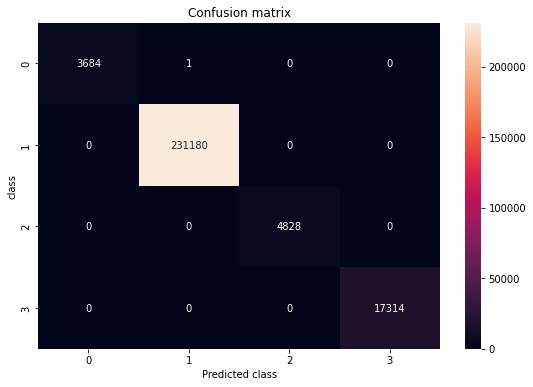

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3685
           1       1.00      1.00      1.00    231180
           2       1.00      1.00      1.00      4828
           3       1.00      1.00      1.00     17314

    accuracy                           1.00    257007
   macro avg       1.00      1.00      1.00    257007
weighted avg       1.00      1.00      1.00    257007



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_rf))

##### Verificación de columna relevante

Para verificar la columna relevante utilizaremos **Feature Importances** la cual mostrará una tabla con las características más importantes del *DataSet* sobre los pacientes.

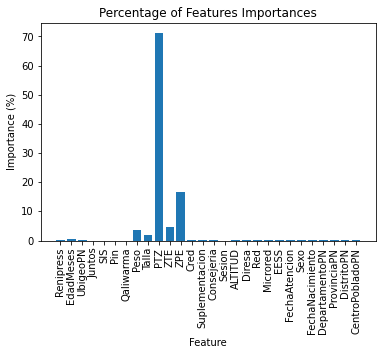

Renipress: 0.18%
EdadMeses: 0.66%
UbigeoPN: 0.11%
Juntos: 0.01%
SIS: 0.01%
Pin: 0.00%
Qaliwarma: 0.00%
Peso: 3.54%
Talla: 1.84%
PTZ: 71.01%
ZTE: 4.59%
ZPE: 16.68%
Cred: 0.10%
Suplementacion: 0.03%
Consejeria: 0.03%
Sesion: 0.00%
ALTITUD: 0.26%
Diresa: 0.12%
Red: 0.10%
Microred: 0.07%
EESS: 0.12%
FechaAtencion: 0.11%
Sexo: 0.04%
FechaNacimiento: 0.12%
DepartamentoPN: 0.05%
ProvinciaPN: 0.06%
DistritoPN: 0.08%
CentroPobladoPN: 0.08%


In [14]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = modelo_rf.feature_importances_
features = df_new.columns[:-1]

total_importance = np.sum(feature_importances)
per_importance = (feature_importances / total_importance) * 100

plt.bar(features, per_importance)
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Percentage of Features Importances')
plt.xticks(rotation=90)
plt.show()

for i, features in enumerate(features):
    print(f"{features}: {per_importance[i]:.2f}%")


##### Conclusión

Puede determinarse que la columna con mayor relevancia para la clasificación de pacientes con obesidad es *PTZ*, seguido de *ZPE* y finalmente de *ZTE*, las cuales tienen el siguiente significado:

- **PTZ:** Índice que compara el peso del menor con el peso esperado para su talla y permite establecer si ha ocurrido una pérdida/ganancia de peso corporal.
- **ZTE:** Índice que compara la talla del menor con la talla esperada para su edad y permite establecer si está ocurriendo un retraso en el crecimiento.
- **ZPE:** Índice que compara el peso del menor con el peso esperado para su edad y permite establecer si está ocurriendo desnutrición.

Con estos resultados se puede analizar que PTZ al comparar los valores del peso y talla con los establecidos por defecto nacionalmente se determinaría si el paciente tiene obesidad o desnutrición, en otras palabras, se compara con una variable determinada por lo que facilitaría bastante a la clasificación de pacientes.

#### Segunda prueba - Decision Tree

Como segunda prueba se ejecutará el modelo **Decision Tree** el cual de la misma forma que el anterior modelo tendrá la función de determinar cuales son las caracteristicas o columnas más importantes en nuestra *DataSet*.

In [15]:
from sklearn.tree import DecisionTreeClassifier

modelo_dtr = DecisionTreeClassifier(criterion='entropy',max_depth=40, min_samples_split=2, random_state = 42)
decision_tree = modelo_dtr.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

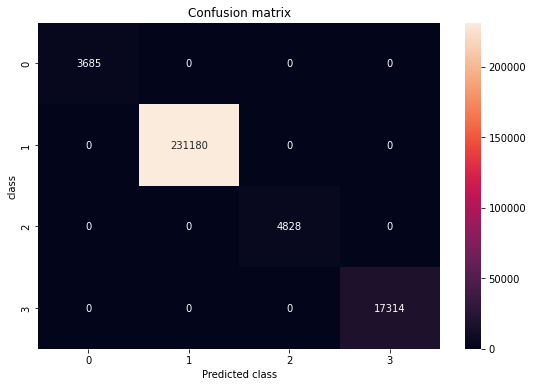

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3685
           1       1.00      1.00      1.00    231180
           2       1.00      1.00      1.00      4828
           3       1.00      1.00      1.00     17314

    accuracy                           1.00    257007
   macro avg       1.00      1.00      1.00    257007
weighted avg       1.00      1.00      1.00    257007



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_dt))

##### Verificación de columna relevante

Para verificar la columna relevante utilizaremos **Feature Importances** la cual mostrará una tabla con las características más importantes del *DataSet* sobre los pacientes.

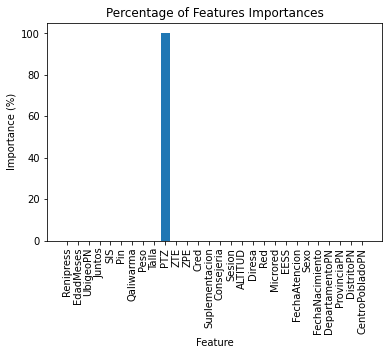

Renipress: 0.00%
EdadMeses: 0.00%
UbigeoPN: 0.00%
Juntos: 0.00%
SIS: 0.00%
Pin: 0.00%
Qaliwarma: 0.00%
Peso: 0.00%
Talla: 0.00%
PTZ: 100.00%
ZTE: 0.00%
ZPE: 0.00%
Cred: 0.00%
Suplementacion: 0.00%
Consejeria: 0.00%
Sesion: 0.00%
ALTITUD: 0.00%
Diresa: 0.00%
Red: 0.00%
Microred: 0.00%
EESS: 0.00%
FechaAtencion: 0.00%
Sexo: 0.00%
FechaNacimiento: 0.00%
DepartamentoPN: 0.00%
ProvinciaPN: 0.00%
DistritoPN: 0.00%
CentroPobladoPN: 0.00%


In [17]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = modelo_dtr.feature_importances_
features = df_new.columns[:-1]

total_importance = np.sum(feature_importances)
per_importance = (feature_importances / total_importance) * 100

plt.bar(features, per_importance)
plt.xlabel('Feature')
plt.ylabel('Importance (%)')
plt.title('Percentage of Features Importances')
plt.xticks(rotation=90)
plt.show()

for i, features in enumerate(features):
    print(f"{features}: {per_importance[i]:.2f}%")

##### Conclusión

Puede apreciarse con la tabla que la columna más relevante que se encuentra en un *100%* es **PTZ**, lo que significa:

- **PTZ:** Índice que compara el peso del menor con el peso esperado para su talla y permite establecer si ha ocurrido una pérdida/ganancia de peso corporal.

Con estos resultados se puede analizar que PTZ compara los valores de peso y talla por lo que se define una variable fija lo que determinará la clasificación de los pacientes sin esfuerzo, mientras que deseamos determinar todo utilizando *Machine Learning*.

### Eliminando variables irrelevantes

Una vez obtenidos los resultados de las pruebas anteriores se procede a analizarlos con el motivo de eliminar las columnas más irrelevantes con las que no se van a trabajar, dentro de esta incluiremos la columna PTZ debido a que esta cumple con la función de determinar usando variables si un paciente está con obesidad o sobrepeso.

Por otro lado, consideraremos las **variables dependientes**  **y variables independientes** de nuestro clasificacdor de pacientes con obesidad que se muestran a continuación:

- Variable Dependiente:
    - EdadMeses
    - Peso
    - Talla
    - Sexo
- Variables Independientes:
    - Dx_PT

In [18]:
df_new = df_new.drop(['Renipress', 'UbigeoPN', 'Juntos', 'SIS', 'Pin',
       'Qaliwarma', 'PTZ', 'ZTE', 'ZPE', 'Cred',
       'Suplementacion', 'Consejeria', 'Sesion', 'ALTITUD', 'Diresa', 'Red',
       'Microred', 'EESS', 'FechaAtencion', 'FechaNacimiento',
       'DepartamentoPN', 'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN'], axis=1)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285032 entries, 0 to 1285031
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   EdadMeses  1285032 non-null  int64  
 1   Peso       1285032 non-null  float64
 2   Talla      1285032 non-null  float64
 3   Sexo       1285032 non-null  int8   
 4   Dx_PT      1285032 non-null  int8   
dtypes: float64(2), int64(1), int8(2)
memory usage: 31.9 MB


### Remove OutLiers (eliminar valores atípicos)

Este paso elimina los valores atípicos que se encuentran en el *DataSet* esto quiere decir los valores que no guardan relación (**variable dependiente e independinte**). En te proceso los separa mediante cuartiles analizando cuales se encuentran dentro y no haciendo uso de código.

In [20]:
columns_to_check = ['EdadMeses','Peso','Talla','Sexo']
Q1 = df_new[columns_to_check].quantile(0.25)
Q3 = df_new[columns_to_check].quantile(0.75)
CQ = Q3 - Q1
CQ

#Remosión de los Outliers
data_no_outliers = df_new[
    ~((df_new[columns_to_check] < (Q1 - 1.5 * CQ)) |
     (df_new[columns_to_check] > (Q3 + 1.5 * CQ))).any(axis=1) ]
print(CQ)

data_no_outliers.info()

EdadMeses    31.00
Peso          5.47
Talla        22.50
Sexo          1.00
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 1277741 entries, 0 to 1285031
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   EdadMeses  1277741 non-null  int64  
 1   Peso       1277741 non-null  float64
 2   Talla      1277741 non-null  float64
 3   Sexo       1277741 non-null  int8   
 4   Dx_PT      1277741 non-null  int8   
dtypes: float64(2), int64(1), int8(2)
memory usage: 41.4 MB


### Balanceamineto de Datos

El balancemiento de datos es muy importante para tener una cantidad exacta de datos, en este caso se reaizará un primer análisis el cual mostrareos con porcentajes, analizado de la cantidad de registros que existe para cada clase a analizar de la *variable dependiente*, por otro lado cuando empecemos a analizar la data se debe tener en cuenta realizar uno de los siguientes procedimientos:

- Undersampling (Encargado de reducir la cantidad de registros a una cifra deseada)
- Oversampling (Encargado de duplicar registros para rellenar la cifra deseada)

Teniendo este concepto en cuenta procederemos a desarrollar lo ya mencionado.

Class=1, n=1154734 (89.860%)
Class=3, n=87252 (6.790%)
Class=0, n=18595 (1.447%)
Class=2, n=24451 (1.903%)


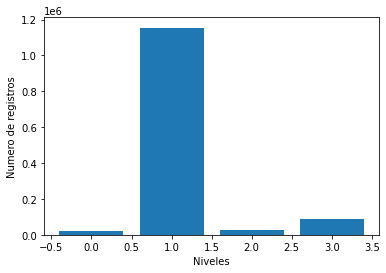

In [21]:
import matplotlib.pyplot as plt
from collections import Counter

X,y = df_new.iloc[:, :-1], df_new.iloc[:, -1]

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xlabel("Niveles")
plt.ylabel("Numero de registros")
plt.show()

#### Oversampling o Undersampling

Como se analizó en la tabla anterior, tenemos una gran cantidad de registro en la *clase 01*, por lo que tendremos que reducir la candidad de registros a la mínima cantidad, en nuestro caso es *18595 registros*, entonces realizaremos **undersamplong** quedandonos en total la cantidad de *74380 registros* lo cual considero es una buena cifra para poder aplicar nuestros modelos de entrenamiento para la clasificación de pacientes con obesidad.

In [22]:
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Código Undersamplig
undersampling_strategy = {1: int(18595),  2: int(18595), 3: int(18595)}
undersampler = RandomUnderSampler(sampling_strategy = undersampling_strategy, random_state=21)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

''' Código Oversampling
oversampling_strategy = {0: int(150000), 1: int(150000),  2: int(150000)}
oversampler = SMOTE(sampling_strategy=oversampling_strategy, random_state=21)
X, y = oversampler.fit_resample(X_undersampled, y_undersampled)
'''

' Código Oversampling\noversampling_strategy = {0: int(150000), 1: int(150000),  2: int(150000)}\noversampler = SMOTE(sampling_strategy=oversampling_strategy, random_state=21)\nX, y = oversampler.fit_resample(X_undersampled, y_undersampled)\n'

Class=0, n=18595 (25.000%)
Class=1, n=18595 (25.000%)
Class=2, n=18595 (25.000%)
Class=3, n=18595 (25.000%)


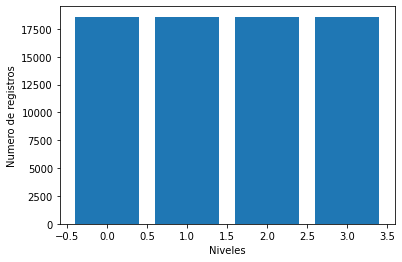

In [23]:
counter = Counter(y_undersampled)
for k,v in counter.items():
	per = v / len(y_undersampled) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xlabel("Niveles")
plt.ylabel("Numero de registros")
plt.show()

## Modelos de entrenamiento para Machine Learning

Una vez toda la data este procesada, balanceada, clasificada y haber clasificado las variables podremos aplicar los modelos de entrenamiento de **Machine Learning**, es decir tendremos que entrenar un *algoritmo* con la computadora para que esta pueda clasificar a partir de la información brindada, con la finalidad de clasificar registros futuros sin necesidad del aspecto humano. Para esto consideraremos los modelos antes mencionados:

- Random Forest
- Decision Trees
- Multinominal Logistic Regression
- Support Vector Machine
- Naibe Bayes

### Random Forest

El primer modelo que estamos desarrollando es **Random Forest** el cual combina el resultado de múltiples árboles de decisión para alcanzar un único resultado. Su facilidad de uso y flexibilidad ha impulsado su adopción, ya que maneja problemas tanto de clasificación como de regresión. Por lo tanto, este modelo nos ayudaría con la clasificación de nuestros pacientes con obesidad de una manera sencilla.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

X,y = X_undersampled, y_undersampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
ran_forest = rfc.fit(X_train, y_train)
y_pred_rf = ran_forest.predict(X_test)

#### Resultado y Conclusiones

Para presentar los resultados y poder hacer un mejor análisis utilizaremos una matriz de confusión la cual incluirá los valores predecidos y las clases que se utlizaron para la clasificación de la data ya modificada.

Finalmente, como conslusiones podemos observar que hay un buen pocentaje de presición al clasificar a los pacientes, este es del **99%** en general por lo que consideramos este modelo de regresión muy bueno a considerar la data que estamos utiizando de *74380 registros*.

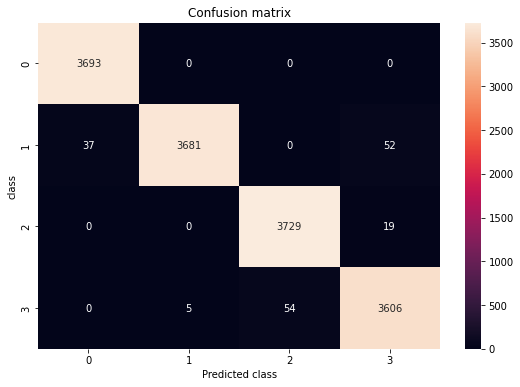

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3693
           1       1.00      0.98      0.99      3770
           2       0.99      0.99      0.99      3748
           3       0.98      0.98      0.98      3665

    accuracy                           0.99     14876
   macro avg       0.99      0.99      0.99     14876
weighted avg       0.99      0.99      0.99     14876



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(y_test, y_pred_rf))

### Desicion Tree

 El algoritmo de aprendizaje supervisado **Desicion Tree** es no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un nodo raíz, ramas, nodos internos y nodos hoja. Esto quiere decir que será un modelo util para el proceso de clasificación de los pacientes con obesidad.

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 21)

dtr = DecisionTreeClassifier(criterion='entropy',max_depth=40, min_samples_split=2, random_state = 42)
decision_tree = dtr.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

#### Resultados y conclusiones

Una vez realizada la matriz de confusión tendremos que analizarla completamente llegando a la conslusión de que el porcentaje de predicción fue del 99% muy similar al random forest. Por lo que, se considera un buen código, recordar que este código es solo una parte de lo que utiliza Random Forest.

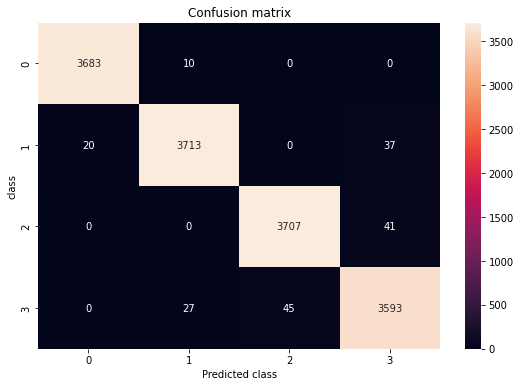

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3693
           1       0.99      0.98      0.99      3770
           2       0.99      0.99      0.99      3748
           3       0.98      0.98      0.98      3665

    accuracy                           0.99     14876
   macro avg       0.99      0.99      0.99     14876
weighted avg       0.99      0.99      0.99     14876



In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_dt))

### Regresión logistica multinominal

La regresión logística multinomial es una técnica estadística utilizada en problemas de clasificación donde hay más de dos categorías o clases a predecir. A diferencia de la regresión logística binomial, que se emplea para problemas de clasificación binaria, la regresión logística multinomial se aplica cuando hay tres o más clases mutuamente excluyentes.

In [30]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regresion = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000).fit(X_train, y_train)
y_pred_rl = regresion.predict(X_test)

#### Resultados y conlusiones

Una vez implementado el modelo anterior podemos analizar según la matriz de confusión que existe una exactitud del 93% algo baja a comparación de los modelos antes aplicados, esto quiere decir que no ha sido tan efectivo pero si ha logrado tener un buen nivel de precisión.

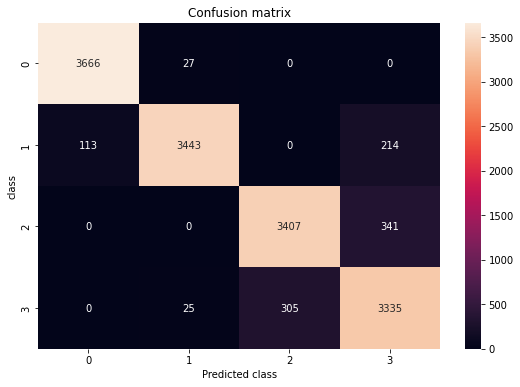

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3693
           1       0.99      0.91      0.95      3770
           2       0.92      0.91      0.91      3748
           3       0.86      0.91      0.88      3665

    accuracy                           0.93     14876
   macro avg       0.93      0.93      0.93     14876
weighted avg       0.93      0.93      0.93     14876



In [31]:
conf_matrix = confusion_matrix(y_test, y_pred_rl)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_rl))

### Support Vector Machine

Support Vector Machines es un algoritmo de aprendizaje supervisado utilizado tanto en problemas de clasificación como en regresión. Su objetivo principal es encontrar el hiperplano óptimo que mejor separa los datos en diferentes clases. En el contexto de clasificación, SVM busca la mejor manera de dividir un conjunto de datos en clases distintas mediante la identificación de un margen de separación máximo entre ellas.

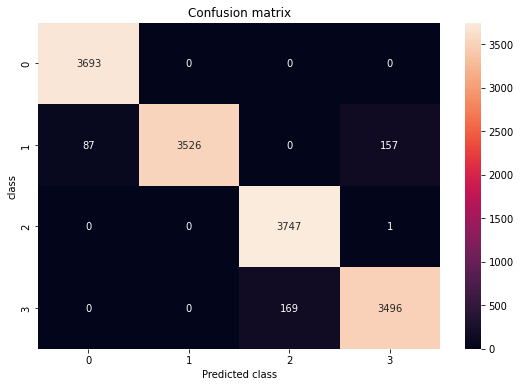

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3693
           1       1.00      0.94      0.97      3770
           2       0.96      1.00      0.98      3748
           3       0.96      0.95      0.96      3665

    accuracy                           0.97     14876
   macro avg       0.97      0.97      0.97     14876
weighted avg       0.97      0.97      0.97     14876



In [32]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SuVeMa = SVC(random_state=42)
SuVeMa.fit(X_train, y_train)
y_pred_svm = SuVeMa.predict(X_test)

#### Resultados y Conlusiones

Aplicando su matriz de confusión así como tambien haber desarrollado su código pasamos a analizar los resultados obtenidos logrando así un porcentaje del 97% de exactitud el cual es muy bueno y podemos considerar también a este modelo uno muy bueno para la cantidad de registros clasificados.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_svm))

### Naibe Bayes

El clasificador Naive Bayes es un algoritmo de aprendizaje supervisado basado en el teorema de Bayes y en la suposición de independencia condicional entre las características (variables predictoras). Aunque esta suposición de independencia condicional rara vez se cumple en la práctica, el clasificador Naive Bayes sigue siendo efectivo en muchos escenarios y es especialmente útil cuando se tienen conjuntos de datos pequeños o moderados.

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

#### Resultados y Conlusiones
Finalmente este ultimo modelo al utilizar solamente dos configuraciones o variables con las que trabaja no es de los mejores modelos al clasificar datos, como se observa en la matriz de clasificación obtenemos un resultado del 39%, siendo así el resutlado más bajo de todos los modelos.


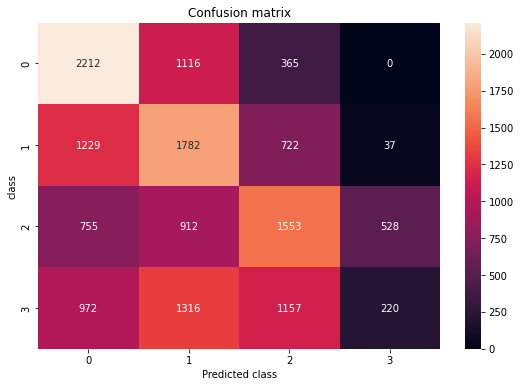

              precision    recall  f1-score   support

           0       0.43      0.60      0.50      3693
           1       0.35      0.47      0.40      3770
           2       0.41      0.41      0.41      3748
           3       0.28      0.06      0.10      3665

    accuracy                           0.39     14876
   macro avg       0.37      0.39      0.35     14876
weighted avg       0.37      0.39      0.35     14876



In [34]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, y_pred_nb))